### Problem Statement

Important Parameters in predicting the demand for shared electric cycles in the Indian Market

In [55]:
import pandas as pd
import os
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
import re
import random
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import boxcox
from scipy.stats import shapiro, kstest
from scipy.stats import levene
from scipy.stats import ttest_ind, f_oneway, kruskal # Numeric Vs Categorical
from scipy.stats import pearsonr, spearmanr # Numeric Vs numeric
from scipy.stats import chi2
from scipy.stats import chisquare # Categorical Vs Categorical
from scipy.stats import ttest_rel
import statistics
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway, kruskal # Numeric Vs Categorical
from scipy.stats import chi2_contingency,chi2, chisquare # Categorical Vs Categorical
from scipy.stats import f

In [2]:
os.chdir(r'E:\Scaler_Notes\Scaler_Business_Cases')

In [3]:
yulu_df=pd.read_csv('bike_sharing.csv')

In [4]:
yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Feature Engineering for DateTime Variable

In [5]:
#yulu_df['datetime']=pd.to_datetime(yulu_df['datetime'])

In [6]:
yulu_df[['date','time']]=yulu_df['datetime'].str.split(' ',expand=True)

In [7]:
yulu_df.drop('datetime',axis=1, inplace=True)

In [8]:
yulu_df[['hour','minute','sec']] = yulu_df['time'].str.split(':',expand=True)

In [9]:
yulu_df.drop(['date','minute','sec','time'],axis=1,inplace=True)

In [10]:
yulu_df['hour']=yulu_df['hour'].astype(int)

In [11]:
yulu_df['hour'].replace({0:24},inplace=True)

In [12]:
yulu_df['day_duration']=pd.cut(yulu_df['hour'],include_lowest=True, bins=[1,4,8,12,16,20,24],labels=['midnight-4','4-8','8-12','12-16','16-20','20-midnight'])

In [13]:
yulu_df.drop('hour',inplace=True,axis=1)

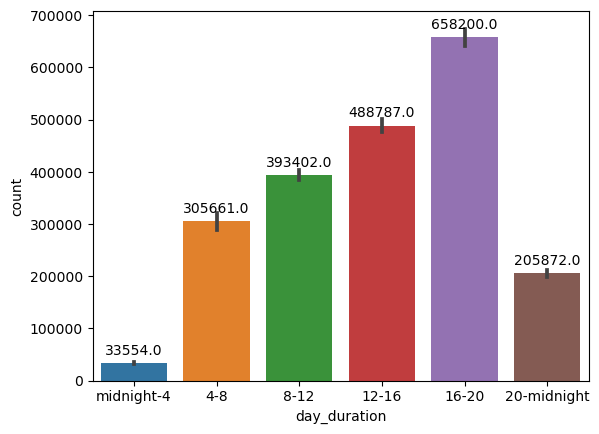

In [14]:
day_duration_bar_plot=sns.barplot(data=yulu_df, x='day_duration', y='count',estimator=sum)
for p in day_duration_bar_plot.patches:
    day_duration_bar_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [15]:
yulu_df['season']=yulu_df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [16]:
yulu_df['weather']=yulu_df['weather'].map({1:'Clear',2:'Mist+Cloudy',3:'Light-Snow',4:'Heavy-Rain'})

In [17]:
yulu_df['holiday']=yulu_df['holiday'].map({0:'N',1:'Y'})

In [18]:
yulu_df['workingday']=yulu_df['workingday'].map({0:'N',1:'Y'})

### Missing Values

In [19]:
yulu_df.isnull().sum()

season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
day_duration    0
dtype: int64

In [20]:
cat_cols=['season','holiday','workingday','weather']
for x in cat_cols:
    yulu_df[x]=yulu_df[x].astype('object')

In [21]:
yulu_df.describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_duration
count,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886
unique,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Winter,N,Y,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-16
freq,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1824
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,NaN
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,NaN
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,NaN
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,NaN
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,NaN


In [22]:
yulu_df[cat_cols].melt().groupby(['variable','value'])[['value']].count()

value
variable   value             
holiday    N            10575
           Y              311
season     Fall          2733
           Spring        2686
           Summer        2733
           Winter        2734
weather    Clear         7192
           Heavy-Rain       1
           Light-Snow     859
           Mist+Cloudy   2834
workingday N             3474
           Y             7412

In [23]:
yulu_df[cat_cols].melt().groupby(['variable'])[['value']].value_counts()

variable    value      
holiday     N              10575
            Y                311
season      Winter          2734
            Fall            2733
            Summer          2733
            Spring          2686
weather     Clear           7192
            Mist+Cloudy     2834
            Light-Snow       859
            Heavy-Rain         1
workingday  Y               7412
            N               3474
dtype: int64

In [24]:
yulu_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_duration
0,Spring,N,N,Clear,9.84,14.395,81,0.0000,3,13,16,20-midnight
1,Spring,N,N,Clear,9.02,13.635,80,0.0000,8,32,40,midnight-4
2,Spring,N,N,Clear,9.02,13.635,80,0.0000,5,27,32,midnight-4
3,Spring,N,N,Clear,9.84,14.395,75,0.0000,3,10,13,midnight-4
4,Spring,N,N,Clear,9.84,14.395,75,0.0000,0,1,1,midnight-4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,N,Y,Clear,15.58,19.695,50,26.0027,7,329,336,16-20
10882,Winter,N,Y,Clear,14.76,17.425,57,15.0013,10,231,241,16-20
10883,Winter,N,Y,Clear,13.94,15.910,61,15.0013,4,164,168,20-midnight
10884,Winter,N,Y,Clear,13.94,17.425,61,6.0032,12,117,129,20-midnight


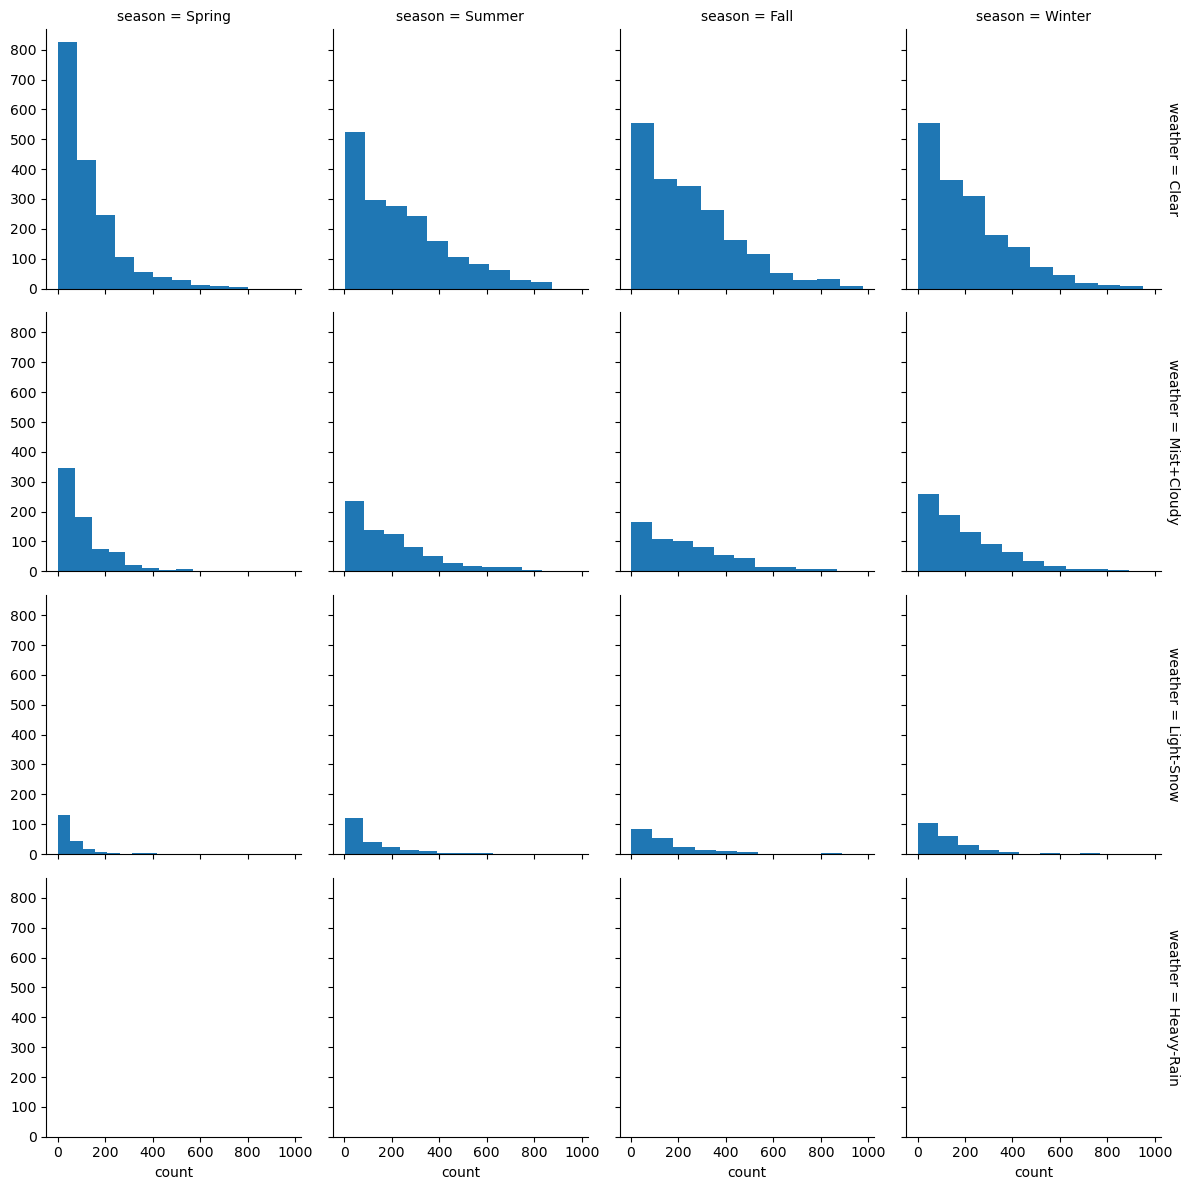

In [25]:
sns.FacetGrid(data=yulu_df, row='weather', col='season', margin_titles=True).map(plt.hist, 'count')

The count follows a lognormal distribution as per the above when plotted cateogry wise

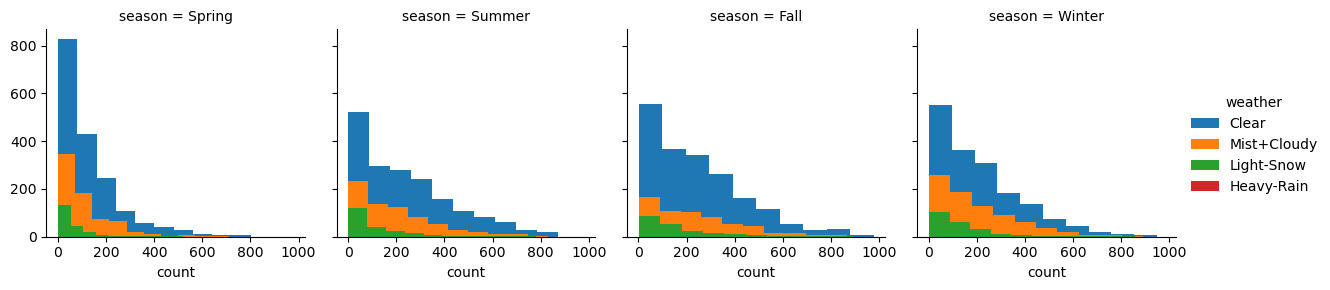

In [26]:
sns.FacetGrid(data=yulu_df, col='season', hue='weather').map(plt.hist,'count').add_legend()

Most bikes are rented out in Clear Weather , then Mist+Cloudy and last is Light-Snow

### Multivariate Analysis

<AxesSubplot:xlabel='season', ylabel='count'>

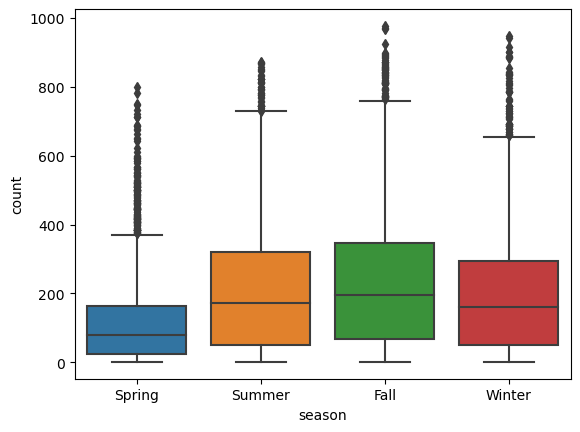

In [27]:
sns.boxplot(data=yulu_df, x='season',y='count')

Bikes rented out in Summer and Fall are slightly higher than Spring and Winter 

<AxesSubplot:xlabel='season', ylabel='registered'>

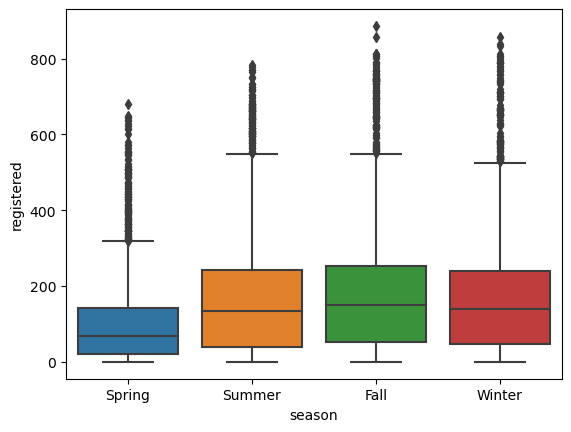

In [28]:
sns.boxplot(data=yulu_df, x='season',y='registered')

<AxesSubplot:xlabel='season', ylabel='casual'>

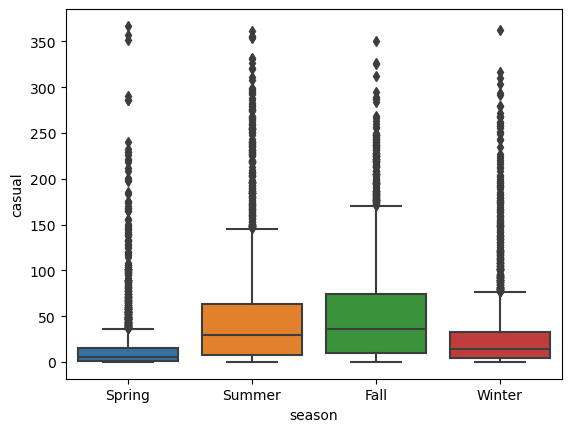

In [29]:
sns.boxplot(data=yulu_df, x='season',y='casual')

<AxesSubplot:xlabel='workingday', ylabel='count'>

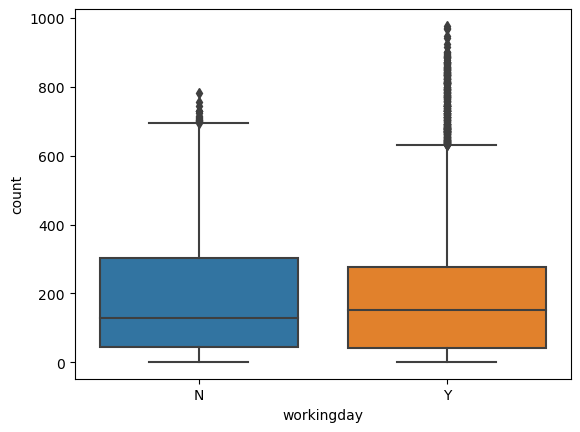

In [30]:
sns.boxplot(data=yulu_df, x='workingday',y='count')

According to the box plot working day does not affect the count of bikes rented.This is verified statistically in further sections.

<AxesSubplot:xlabel='holiday', ylabel='count'>

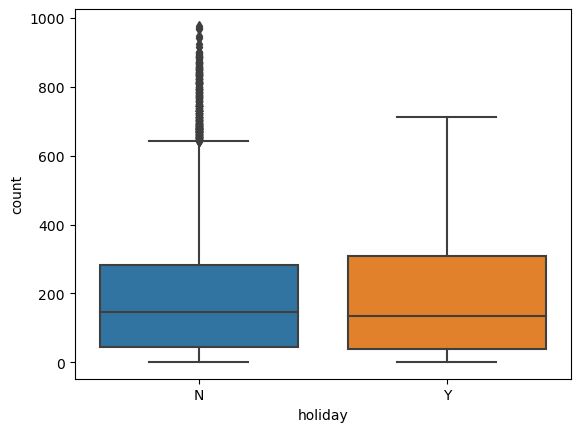

In [31]:
sns.boxplot(data=yulu_df, x='holiday',y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

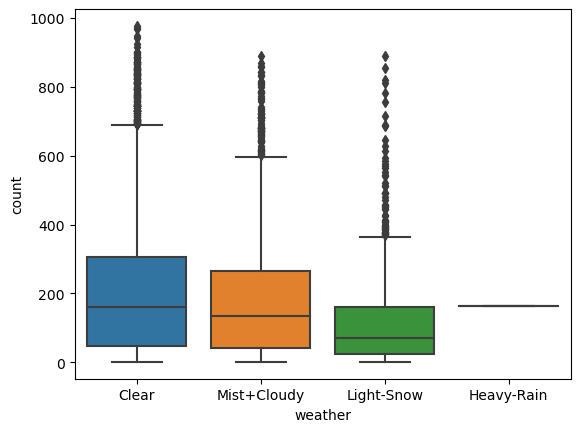

In [32]:
sns.boxplot(data=yulu_df, x='weather',y='count')

<AxesSubplot:xlabel='temp', ylabel='count'>

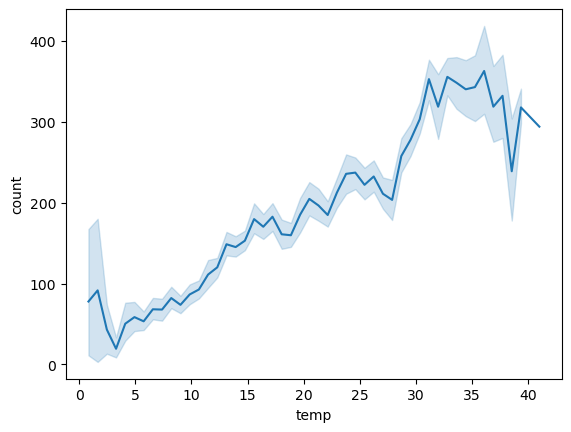

In [33]:
sns.lineplot(x='temp',y='count',data=yulu_df)

<AxesSubplot:xlabel='atemp', ylabel='count'>

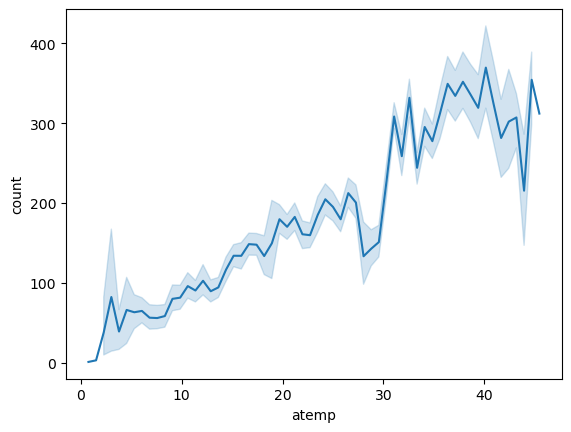

In [34]:
sns.lineplot(x='atemp',y='count',data=yulu_df)

<AxesSubplot:xlabel='humidity', ylabel='count'>

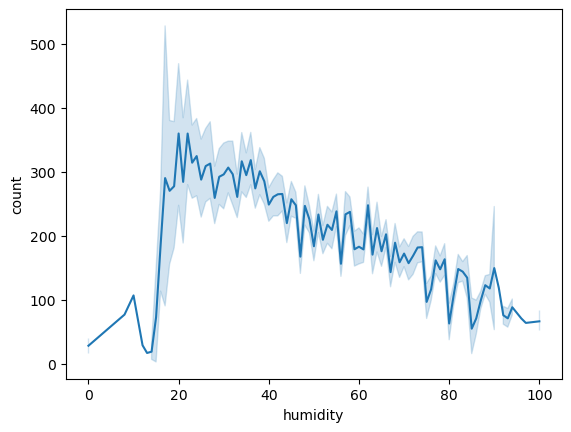

In [35]:
sns.lineplot(x='humidity',y='count',data=yulu_df)

With respect to increasing humidity the count of bikes rented decreases

<AxesSubplot:xlabel='windspeed', ylabel='count'>

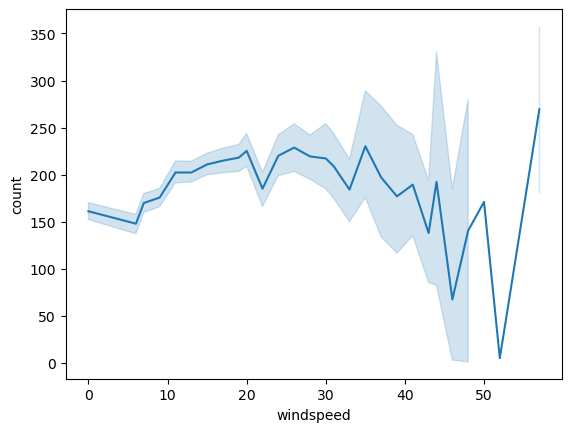

In [36]:
sns.lineplot(x='windspeed',y='count',data=yulu_df)

Count is inversely related to windspeed and humidity

### Univariate Analysis

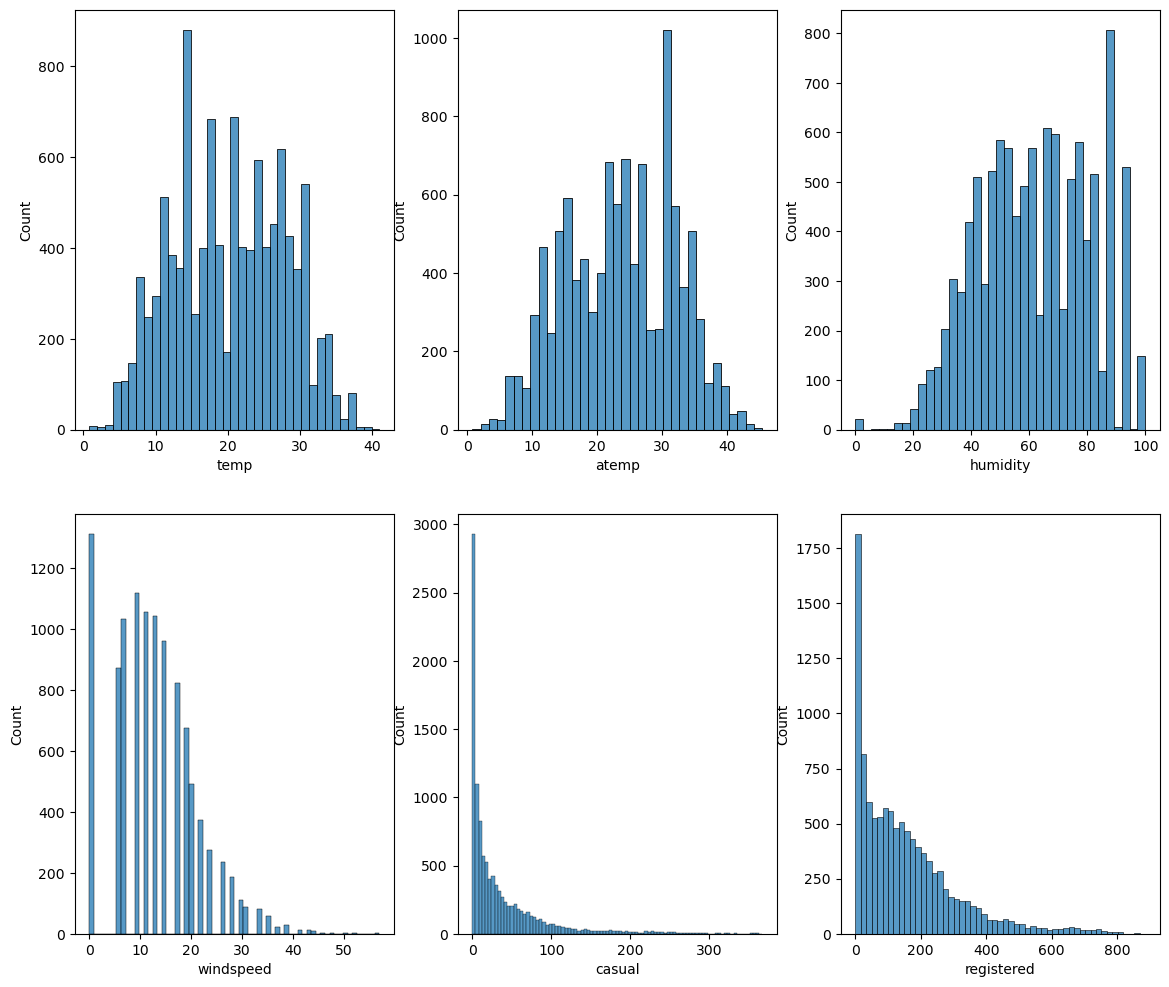

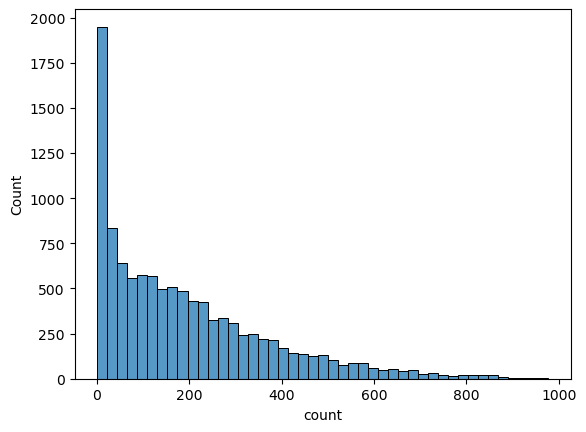

In [37]:
num_cols=['temp','atemp','humidity','windspeed','casual','registered','count']
f,axes=plt.subplots(nrows=2,ncols=3, figsize=(14,12))
index=0
for row in range(2):
    for col in range(3):
        sns.histplot(x=yulu_df[num_cols[index]],ax=axes[row,col])
        index+=1
plt.show()
sns.histplot(x=yulu_df[num_cols[-1]]) 
plt.show()

Causal, Registered and count have log-normal distribution
temp, atemp and humidity follow normal distribution

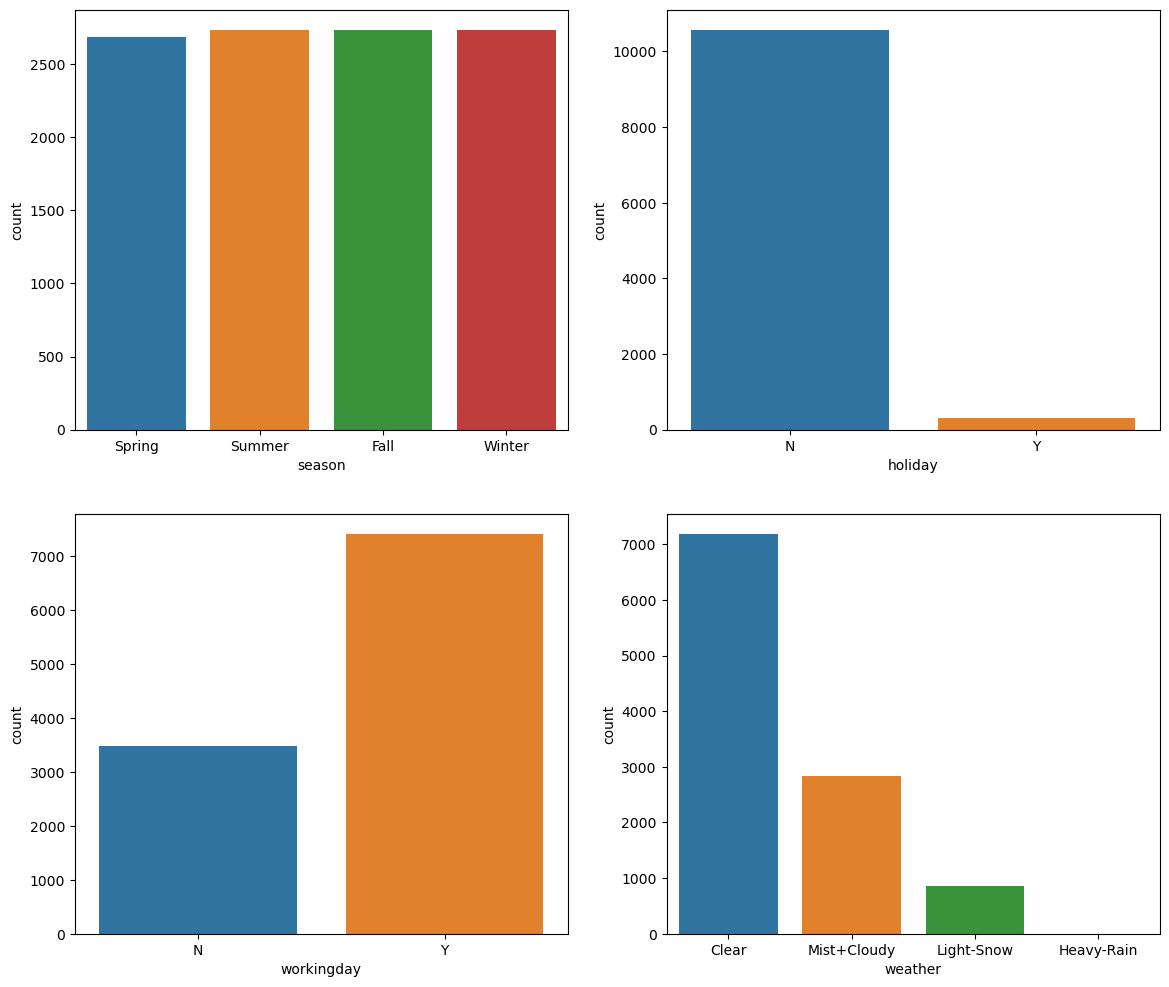

In [38]:
f,axes=plt.subplots(nrows=2,ncols=2, figsize=(14,12))
index=0
for row in range(2):
    for col in range(2):
        sns.countplot(x=yulu_df[cat_cols[index]],ax=axes[row,col])
        index+=1

Count of Bikes rented out is uniform across the 4 seasons
Working day dominates the bikes rented out, which is obvious that people go to offices

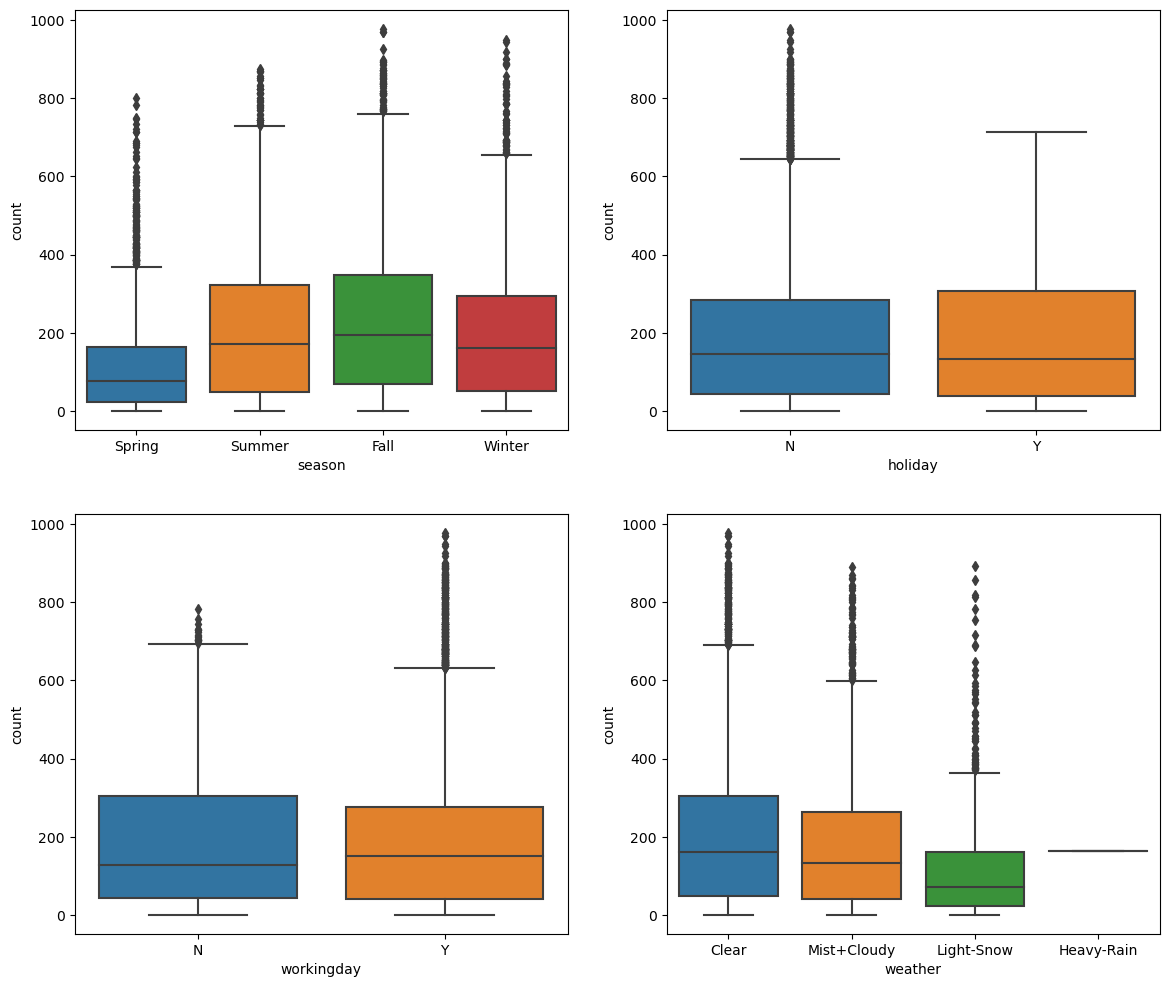

In [39]:
f,axes=plt.subplots(nrows=2,ncols=2, figsize=(14,12))
index=0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=yulu_df,x=yulu_df[cat_cols[index]],y='count',ax=axes[row,col])
        index+=1

More bikes are rented in Fall and Winter
More bikes are rented on a non-working day
More bikes are rented when weather is Clear and Cloudy

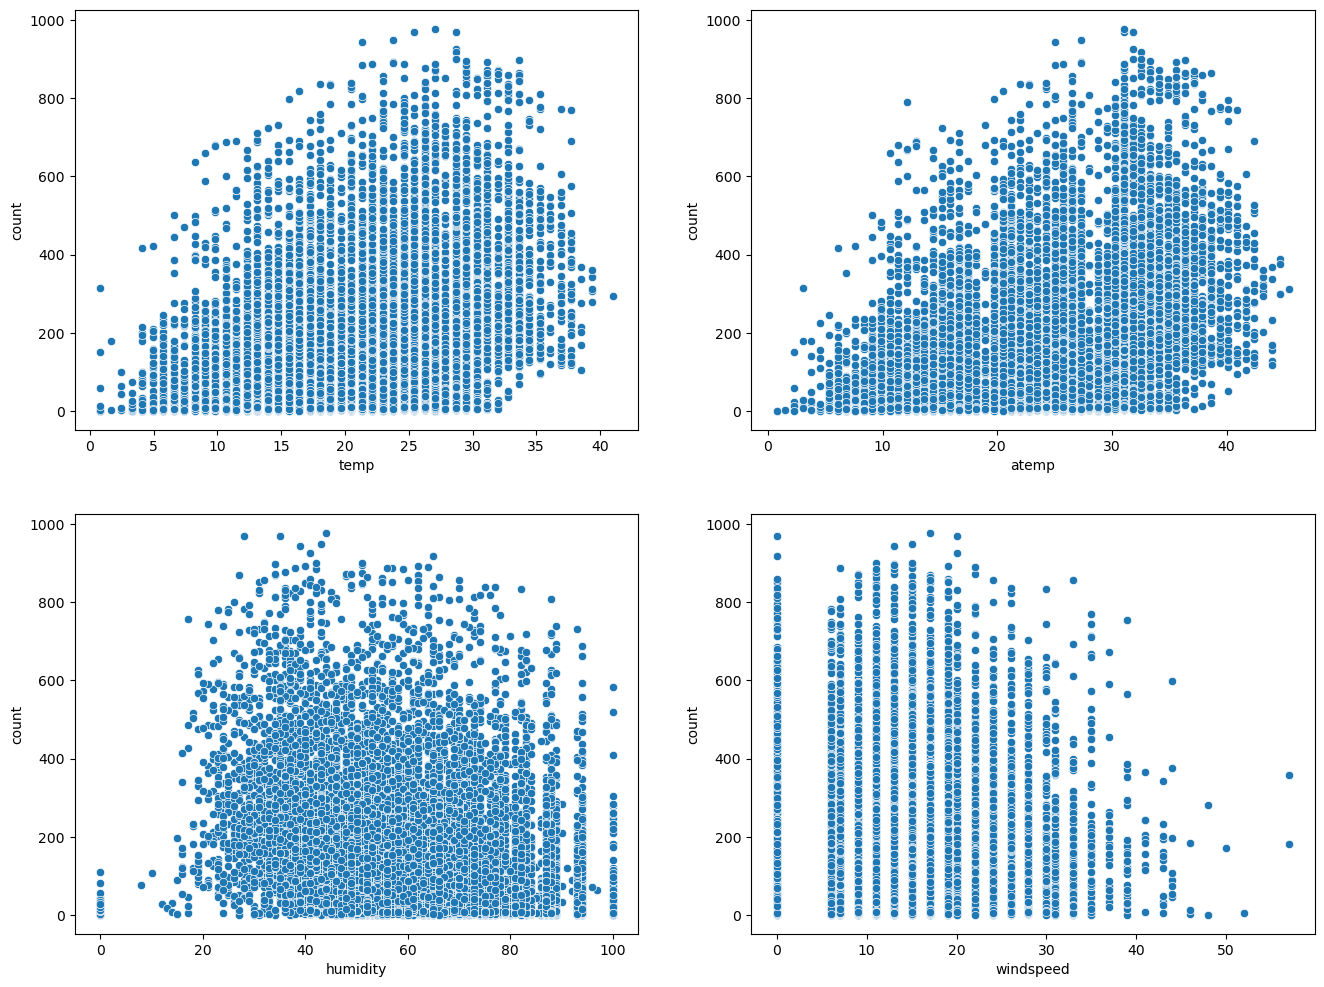

In [40]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.scatterplot(data=yulu_df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

There is some linear relationship is observed in temp vs count of bikes. 
The inference is people tend go out for riding as temperature increases. 
For the other three variables humidity, windspeed and atemp no relationship exists as per the scatter plot

In [41]:
yulu_df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<AxesSubplot:>

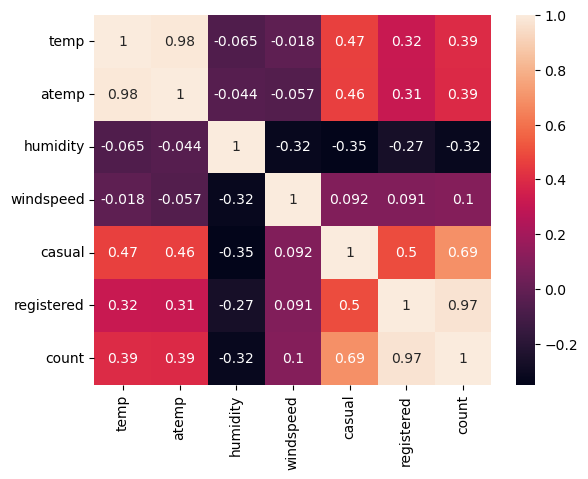

In [42]:
sns.heatmap(yulu_df.corr(),annot=True)

Temp is higly correlated with the count of bikes issued
Humidity is negatively correlated with the count of bikes issued

Select an appropriate test to check whether:
Working Day has effect on number of electric cycles rented
No. of cycles rented similar or different in different seasons
No. of cycles rented similar or different in different weather
Weather is dependent on season (check between 2 predictor variable)

### Working Day has effect on number of electric cycles rented 
Here we perform ttest independent to test if there the count in two groups is statistically significant

In [43]:
holiday = yulu_df[yulu_df["workingday"]=='N'][['count']]
workingday=yulu_df[yulu_df["workingday"]=='Y'][['count']]
t_stat, p_value=ttest_ind(holiday,workingday)
if p_value<0.05:
    print('Reject H0')
    print('Working day has an affect on the count of bikes rented')
else:
    print('Fail to reject H0')
    print('There is no difference between the nmber of bikes rented on working day and holiday')

Fail to reject H0
There is no difference between the nmber of bikes rented on working day and holiday


In [44]:
holiday.mean()

count    188.506621
dtype: float64

### No. of cycles rented similar or different in different seasons

H0: There is no difference in count of bikes rented across the diff seasons
Ha: There is a difference in the count of bikes rented across the diff seasons

In [45]:
yulu_df['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [46]:
yulu_df.season.value_counts()

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64

In [47]:
season_Winter=yulu_df[yulu_df["season"]=='Winter'][['count']].sample(150)
season_Summer=yulu_df[yulu_df["season"]=='Summer'][['count']].sample(150)
season_Fall=yulu_df[yulu_df["season"]=='Fall'][['count']].sample(150)
season_Spring=yulu_df[yulu_df["season"]=='Spring'][['count']].sample(150)

In [50]:
print(len(season_Winter))
print(len(season_Summer))
print(len(season_Fall))
print(len(season_Spring))

150
150
150
150


In [56]:
f_stat, p_value = f_oneway(season_Winter,season_Summer,season_Fall,season_Spring) 
f_critical=f.ppf(q=.95, dfn=3,dfd=150-4)
print(f_critical,f_stat)
if p_value<0.05:
    print('Reject H0')
    print('Season has an affect on the count of bikes rented')
else:
    print('Fail to reject H0')
    print('Season has no affect on the count of bikes rented')   

2.6665742133041834 [17.78853228]
Reject H0
Season has an affect on the count of bikes rented


### No. of cycles rented similar or different in different weather

In [89]:
yulu_df['weather'].unique()

array(['Clear', 'Mist+Cloudy', 'Light-Snow', 'Heavy-Rain'], dtype=object)

H0: Weather does not have an affect on the count of bikes rented across the diff seasons
Ha: Weather has an affect on the count of bikes rented across the diff seasons

In [57]:
weather_1=yulu_df[yulu_df["weather"]=='Clear'][['count']]
weather_2=yulu_df[yulu_df["weather"]=='Mist+Cloudy'][['count']]
weather_3=yulu_df[yulu_df["weather"]=='Light-Snow'][['count']]
weather_4=yulu_df[yulu_df["weather"]=='Heavy-Rain'][['count']]

In [66]:
f_stat, p_value = f_oneway(weather_1,weather_2,weather_3) 
print(f_stat)
print(p_value)
if p_value<0.05:
    print('Reject H0')
    print('Weather has an affect on the count of bikes rented across the diff seasons')
else:
    print('Fail to reject H0')
    print('Weather does not have an affect on the count of bikes rented across the diff seasons')

[98.28356882]
[4.97644851e-43]
Reject H0
Weather has an affect on the count of bikes rented across the diff seasons


### Chi-square test to check if Weather is dependent on the season

In [59]:
print(yulu_df['weather'].unique())
print(yulu_df['season'].unique())

['Clear' 'Mist+Cloudy' 'Light-Snow' 'Heavy-Rain']
['Spring' 'Summer' 'Fall' 'Winter']


H0: Weather and Season are independent 
Ha: Waether is dependent on Season

In [60]:
table=np.array(pd.crosstab(yulu_df['season'], yulu_df['weather']))

In [62]:
print(table)

[[1930    0  199  604]
 [1759    1  211  715]
 [1801    0  224  708]
 [1702    0  225  807]]


In [64]:
yulu_df['weather'].value_counts()

Clear          7192
Mist+Cloudy    2834
Light-Snow      859
Heavy-Rain        1
Name: weather, dtype: int64

In [67]:
pd.crosstab(yulu_df['season'], yulu_df['weather'])[['Clear','Light-Snow','Mist+Cloudy']]

weather,Clear,Light-Snow,Mist+Cloudy
season,,,
Fall,1930,199,604
Spring,1759,211,715
Summer,1801,224,708
Winter,1702,225,807


In [73]:
chi2_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(yulu_df['season'], yulu_df['weather'])[['Clear','Light-Snow','Mist+Cloudy']])
print(chi2_stat)
print(round(p_value,6))
print(dof)
print(expected)

46.10145731073249
0.0
6
[[1805.76352779  215.67726229  711.55920992]
 [1774.04869086  211.8892972   699.06201194]
 [1805.76352779  215.67726229  711.55920992]
 [1806.42425356  215.75617823  711.81956821]]


In [69]:
expected

array([[1805.76352779,  215.67726229,  711.55920992],
       [1774.04869086,  211.8892972 ,  699.06201194],
       [1805.76352779,  215.67726229,  711.55920992],
       [1806.42425356,  215.75617823,  711.81956821]])

In [103]:
critical_value=chi2.ppf(0.95, df=9)
print(f'The Critical value for Chi_Square Distribution is {critical_value:.2f}')
if chi2_stat<critical_value:
    print('Fail to Reject H0')
    print('Weather is not dependent on Season')
else:
    print('Reject H0')
    print('Weather is dependent on Season')

The Critical value for Chi_Square Distribution is 16.92
Reject H0
Weather is dependent on Season


### Test of Normality

#### Temperature

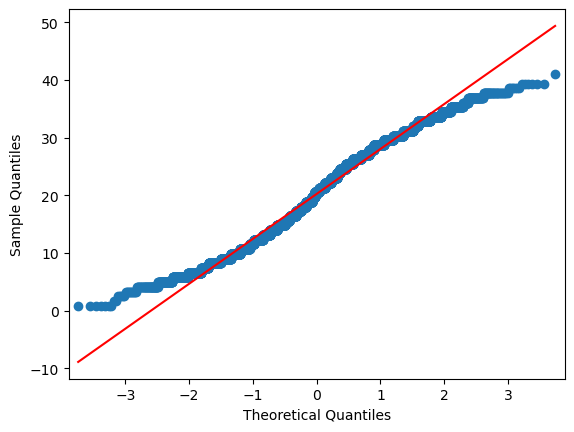

In [113]:
temperature=yulu_df['temp']
qqplot(temperature, line='s')
plt.show()

#### Atemperature

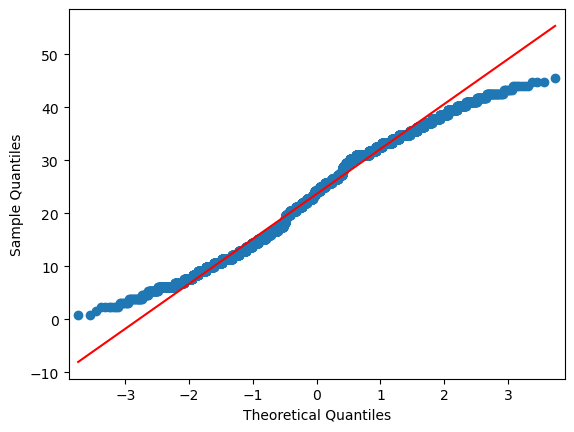

In [135]:
atemp=yulu_df['atemp']
qqplot(atemp, line='s')
plt.show()

#### Humidity

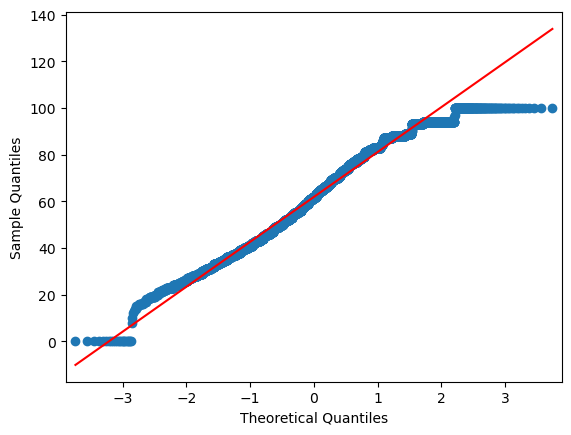

In [136]:
humidity=yulu_df['humidity']
qqplot(humidity, line='s')
plt.show()

In [137]:
humidity_subset = yulu_df['humidity'].sample(100)

In [138]:
transformed_humidity_subset  = boxcox(humidity_subset)[0]

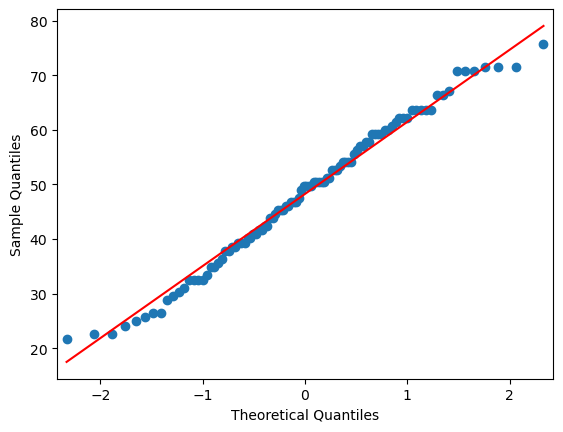

In [139]:
qqplot(transformed_humidity_subset, line="s")
plt.show()

In [ ]:
Humidity becomes normally distributed after doing Box-Cox Tranformation

#### Windspeed

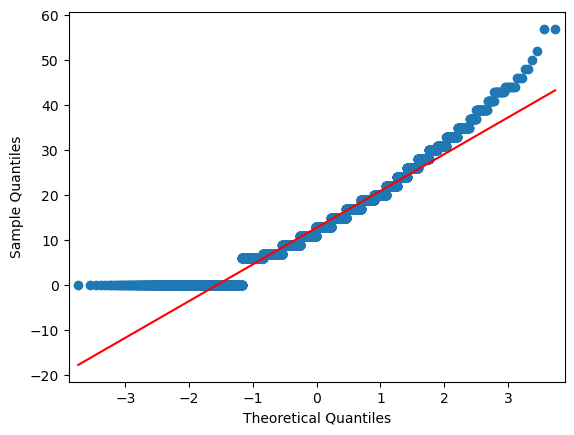

In [140]:
windspeed=yulu_df['windspeed']
qqplot(windspeed, line='s')
plt.show()

In [147]:
windspeed_subset = yulu_df['windspeed'].sample(100)
windspeed_subset.unique()

array([11.0014, 36.9974, 12.998 ,  0.    , 16.9979, 27.9993,  6.0032,
       22.0028, 26.0027, 19.0012,  8.9981, 15.0013, 19.9995, 30.0026,
       35.0008,  7.0015, 23.9994])

In [148]:
transformed_windspeed_subset  = boxcox(windspeed_subset+0.001)[0]

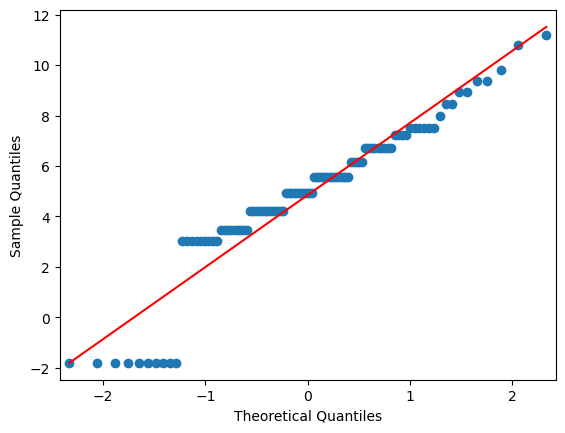

In [149]:
qqplot(transformed_windspeed_subset, line="s")
plt.show()

In [155]:
log_windspeed=np.log(yulu_df.loc[yulu_df['windspeed']!=0,'windspeed'])

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

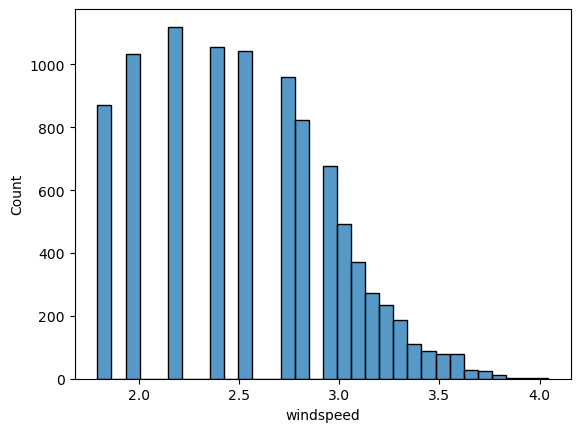

In [156]:
sns.histplot(log_windspeed)

After doing log-transformation windspeed is not normally distributed

In [116]:
yulu_df.shape

(10886, 12)

##### Shapiro

H0: Data is Gaussian
Ha: Data is not Gaussian

In [118]:
temp_subset = temperature.sample(100)

test_stat, p_value = shapiro(temp_subset)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


##### Kolmogorov-Smirfnoff test

KSTest
H0: Data is Gaussian
Ha: Data is not Gaussian

In [119]:
test_stat, p_value = kstest(
    temp_subset, 
    norm.cdf, 
    args=(temp_subset.mean(), temp_subset.std())
)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


##### Levenes test of equal variance for season - count

H0: both have same variance
Ha: atleast one group has a different variance

In [123]:
yulu_df['season'].unique()

array([1, 2, 3, 4], dtype=object)

In [120]:
season_1_count= yulu_df[yulu_df["season"]==1]['count']
season_2_count = yulu_df[yulu_df["season"]==2]['count']
season_3_count = yulu_df[yulu_df["season"]==3]['count']
season_4_count = yulu_df[yulu_df["season"]==4]['count']

In [121]:
test_stat, p_value = levene(season_1_count,season_2_count,season_3_count,season_4_count)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

Reject H0
Variances are different


##### Levenes test of equal variance for holiday - count

In [124]:
yulu_df['holiday'].unique()

array([0, 1], dtype=object)

In [125]:
holiday_0_count= yulu_df[yulu_df["holiday"]==0]['count']
holiday_1_count = yulu_df[yulu_df["holiday"]==1]['count']

In [126]:
test_stat, p_value = levene(holiday_0_count,holiday_1_count)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

Fail to reject H0
Variances are the same


##### Levenes test of equal variance for working-day - count

In [127]:
yulu_df['workingday'].unique()

array([0, 1], dtype=object)

In [128]:
workingday_0_count= yulu_df[yulu_df["workingday"]==0]['count']
workingday_1_count = yulu_df[yulu_df["workingday"]==1]['count']

In [129]:
test_stat, p_value = levene(workingday_0_count,workingday_1_count)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

Fail to reject H0
Variances are the same


##### Levenes test of equal variance for weather - count

In [131]:
yulu_df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [133]:
weather_1_count=yulu_df[yulu_df["weather"]==1]['count']
weather_2_count=yulu_df[yulu_df["weather"]==2]['count']
weather_3_count=yulu_df[yulu_df["weather"]==3]['count']
weather_4_count=yulu_df[yulu_df["weather"]==4]['count']

In [134]:
test_stat, p_value = levene(weather_1_count,weather_2_count,weather_3_count,weather_4_count)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

Reject H0
Variances are different


#### ANOVA ot check the Weather vs Windspeed

In [51]:
yulu_df['weather'].unique()

array(['Clear', 'Mist+Cloudy', 'Light-Snow', 'Heavy-Rain'], dtype=object)

In [62]:
clear=yulu_df[yulu_df['weather']=='Clear']['windspeed']
mist=yulu_df[yulu_df['weather']=='Mist+Cloudy']['windspeed']
light_snow=yulu_df[yulu_df['weather']=='Light-Snow']['windspeed']
heavy_rain=yulu_df[yulu_df['weather']=='Heavy-Rain']['windspeed']

In [69]:
clear_sample=clear.sample(100).values

In [71]:
mist_sample=mist.sample(100).values

In [73]:
light_snow_sample=light_snow.sample(100).values

In [76]:
heavy_rain_sample=heavy_rain.sample(100, replace=True).values

In [79]:
f_stat, p_value=f_oneway(clear_sample,mist_sample,light_snow_sample,heavy_rain_sample)
print(f_stat)
print(p_value)
f_critical=f.ppf(0.90, dfn=3,dfd=96)
print(f_critical)
if f_stat<f_critical:
    print('Fail to Reject H0')
    print('There is no variance in windspeed for different weather types')
else:
    print('Reject H0')
    print('There is variance in windspeed for different weather types')

24.020435323114143
2.6600516464412784e-14
2.141730125113595
Reject H0
There is variance in windspeed for different weather types


Just to make dfn and dfd a little more clear for DSM's answer / scipy.stats:

dfn denotes number of degrees of freedom that the estimate of variance used in the numerator.

dfd is the number of degrees of freedom that the estimate of variance used in the denominator.

dfn = a-1
dfd = N-a
where a is the number of groups and N is the total number of subjects in the experiment.
The shape of the F distribution depends on dfn and dfd. The lower the degrees of freedom, the larger the value of F needed to be significant.